<a href="https://colab.research.google.com/github/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/collections_demos/lidc_idri-visualization_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring IDC Metadata from Colab/R

In this notebook you will learn how to search [NCI Imaging Data Commons](https://imaging.datacommons.cancer.gov) metadata catalog using R.

This notebook was developed and tested in Google Colab, and may need additional refinements when used outside of Colab.

In order to be able to run this notebook you must have a google account and a Google Cloud Project. You can learn how to create such a project in this tutorial: https://github.com/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/getting_started/part1_prerequisites.ipynb

This notebook was developed by Dennis Bontempi.

First release: Sept 2023

## Environment Setup

Install dependencies.

The most important one will be `bigrquery`, which we'll use to handle BigQuery natively in R.

In [2]:
dependencies = c(
  "bigrquery",
  "ggthemes",
  "ggbeeswarm",
  "plyr"
)

Note: the next cell could take a few minutes to execute, depending on how large are the dependencies specified for installation (and this can be significantly slower than its python counterpart!).

In our case, this should run in under a minute.

In [3]:
install.packages(dependencies)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘assertthat’, ‘Rcpp’, ‘rapidjsonr’, ‘beeswarm’, ‘vipor’




Import all of the dependencies we might need to clean dataframes, for visualization purposes, and so on.

In [ ]:
library("plyr")
library("dplyr")
library("tidyr")

library("ggplot2")
library("ggthemes")
library("ggbeeswarm")

library("RColorBrewer")

library("bigrquery")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Set options for plotting (plot height and width).

In [ ]:
options(repr.plot.width  = 20,
        repr.plot.height = 12)

## Run `bigrquery`

We can test `bigrquery` and its functionalities by parsing some of the data accompanying the LIDC collection on IDC.

More details (and a tutorial on how to run similar analyses using Python!) can be found in the [LIDC_exploration tutorial notebook](https://github.com/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/LIDC_exploration.ipynb).

In [ ]:
billing <- "e8Civ0HoDy" # replace this with your project ID
sql <- "
  SELECT
    collection_id,
    all_attributes.PatientID,
    all_attributes.SeriesDescription,
    trackingIdentifier,
    trackingUniqueIdentifier,
    Quantity.CodeMeaning as Quantity,
    'Units.CodeMeaning' as Units,
    Value,
    all_attributes.StudyInstanceUID,
    all_attributes.SOPInstanceUID,
    all_attributes.Source_DOI
  FROM
    `bigquery-public-data.idc_current.quantitative_measurements` AS measurements_attributes
  JOIN
    `bigquery-public-data.idc_current.dicom_all` AS all_attributes
  ON
    measurements_attributes.SOPInstanceUID = all_attributes.SOPInstanceUID
  WHERE
    Source_DOI = '10.7937/TCIA.2018.h7umfurq'
"

This will require the user to authenticate upon first run!

In [ ]:
tb <- bq_project_query(billing, sql)
df <- bq_table_download(tb)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 2


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=99836be3c017e3171f3a2855bb397c27&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbENCd1pKeGF0WE5yLTVUeGxXVWUzRWFoRmlUTGFlTzRKREFIU0hkVExUM09QRm1YMnI5RUlGQnFDMTRLYUNQUSIsInN0YXRlIjoiOTk4MzZiZTNjMDE3ZTMxNzFmM2EyODU1YmIzOTdjMjcifQ==


In [ ]:
head(df, 10)

collection_id,PatientID,SeriesDescription,trackingIdentifier,trackingUniqueIdentifier,Quantity,Units,Value,StudyInstanceUID,SOPInstanceUID,Source_DOI
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
lidc_idri,LIDC-IDRI-0011,Nodule 10 - Annotation Nodule 001 evaluations,Nodule 10,2.25.46882975729200338148443734071299361795246965467219023823363,Diameter,Units.CodeMeaning,15.300600,1.3.6.1.4.1.14519.5.2.1.6279.6001.292628672046109312619048073568,1.2.276.0.7230010.3.1.4.0.90162.1553284618.323125,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0011,Nodule 10 - Annotation Nodule 001 evaluations,Nodule 10,2.25.46882975729200338148443734071299361795246965467219023823363,Surface area of mesh,Units.CodeMeaning,565.919000,1.3.6.1.4.1.14519.5.2.1.6279.6001.292628672046109312619048073568,1.2.276.0.7230010.3.1.4.0.90162.1553284618.323125,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0011,Nodule 10 - Annotation Nodule 001 evaluations,Nodule 10,2.25.46882975729200338148443734071299361795246965467219023823363,Volume,Units.CodeMeaning,762.229000,1.3.6.1.4.1.14519.5.2.1.6279.6001.292628672046109312619048073568,1.2.276.0.7230010.3.1.4.0.90162.1553284618.323125,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0039,Nodule 4 - Annotation Nodule 006 evaluations,Nodule 4,2.25.98365670933789563895098604890099114081531562354023034688139,Volume,Units.CodeMeaning,79.149100,1.3.6.1.4.1.14519.5.2.1.6279.6001.301893285809694674511225349300,1.2.276.0.7230010.3.1.4.0.1761.1553286456.135071,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0039,Nodule 4 - Annotation Nodule 006 evaluations,Nodule 4,2.25.98365670933789563895098604890099114081531562354023034688139,Diameter,Units.CodeMeaning,6.732256,1.3.6.1.4.1.14519.5.2.1.6279.6001.301893285809694674511225349300,1.2.276.0.7230010.3.1.4.0.1761.1553286456.135071,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0039,Nodule 4 - Annotation Nodule 006 evaluations,Nodule 4,2.25.98365670933789563895098604890099114081531562354023034688139,Surface area of mesh,Units.CodeMeaning,81.794520,1.3.6.1.4.1.14519.5.2.1.6279.6001.301893285809694674511225349300,1.2.276.0.7230010.3.1.4.0.1761.1553286456.135071,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0067,Nodule 4 - Annotation MI014_20590 evaluations,Nodule 4,2.25.36295716718488855930074064183472251860210877158953751708830,Diameter,Units.CodeMeaning,8.043461,1.3.6.1.4.1.14519.5.2.1.6279.6001.185496461202477950899792771158,1.2.276.0.7230010.3.1.4.0.4185.1553288581.406014,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0067,Nodule 4 - Annotation MI014_20590 evaluations,Nodule 4,2.25.36295716718488855930074064183472251860210877158953751708830,Volume,Units.CodeMeaning,88.500980,1.3.6.1.4.1.14519.5.2.1.6279.6001.185496461202477950899792771158,1.2.276.0.7230010.3.1.4.0.4185.1553288581.406014,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0067,Nodule 4 - Annotation MI014_20590 evaluations,Nodule 4,2.25.36295716718488855930074064183472251860210877158953751708830,Surface area of mesh,Units.CodeMeaning,90.515980,1.3.6.1.4.1.14519.5.2.1.6279.6001.185496461202477950899792771158,1.2.276.0.7230010.3.1.4.0.4185.1553288581.406014,10.7937/TCIA.2018.h7umfurq


## Data Visualization

As an example, we can plot the volume of the most frequent category of nodules (a variable stored in the `trackingIdentifier` column).

We can start by filtering the dataframe to keep only nodules' volumetric information.

In [ ]:
df_filt <- df[which(df$Quantity == "Volume"), ]
head(df_filt, 10)

collection_id,PatientID,SeriesDescription,trackingIdentifier,trackingUniqueIdentifier,Quantity,Units,Value,StudyInstanceUID,SOPInstanceUID,Source_DOI
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
lidc_idri,LIDC-IDRI-0011,Nodule 10 - Annotation Nodule 001 evaluations,Nodule 10,2.25.46882975729200338148443734071299361795246965467219023823363,Volume,Units.CodeMeaning,762.22900,1.3.6.1.4.1.14519.5.2.1.6279.6001.292628672046109312619048073568,1.2.276.0.7230010.3.1.4.0.90162.1553284618.323125,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0039,Nodule 4 - Annotation Nodule 006 evaluations,Nodule 4,2.25.98365670933789563895098604890099114081531562354023034688139,Volume,Units.CodeMeaning,79.14910,1.3.6.1.4.1.14519.5.2.1.6279.6001.301893285809694674511225349300,1.2.276.0.7230010.3.1.4.0.1761.1553286456.135071,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0067,Nodule 4 - Annotation MI014_20590 evaluations,Nodule 4,2.25.36295716718488855930074064183472251860210877158953751708830,Volume,Units.CodeMeaning,88.50098,1.3.6.1.4.1.14519.5.2.1.6279.6001.185496461202477950899792771158,1.2.276.0.7230010.3.1.4.0.4185.1553288581.406014,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0129,Nodule 10 - Annotation 131506 evaluations,Nodule 10,2.25.10922444212683187287627414506694306766224866326616762184608,Volume,Units.CodeMeaning,62.65839,1.3.6.1.4.1.14519.5.2.1.6279.6001.336271942450113106996588030279,1.2.276.0.7230010.3.1.4.0.8732.1553292266.640069,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0135,Nodule 1 - Annotation 6 evaluations,Nodule 1,2.25.15396478826443819060545844081220354334563804953033288703685,Volume,Units.CodeMeaning,605.59080,1.3.6.1.4.1.14519.5.2.1.6279.6001.180685600263085599637486877417,1.2.276.0.7230010.3.1.4.0.9490.1553292809.736734,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0171,Nodule 1 - Annotation 6 evaluations,Nodule 1,2.25.84756476829102327996507692345668733333636167156408054045504,Volume,Units.CodeMeaning,2812.85900,1.3.6.1.4.1.14519.5.2.1.6279.6001.103909846248671377349144781232,1.2.276.0.7230010.3.1.4.0.12289.1553295244.452820,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0201,Nodule 5 - Annotation 9709 evaluations,Nodule 5,2.25.74710277233656709866020595046522708880864194259713887576683,Volume,Units.CodeMeaning,82.68344,1.3.6.1.4.1.14519.5.2.1.6279.6001.213021675581421639588001132423,1.2.276.0.7230010.3.1.4.0.13832.1553296660.569182,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0309,Nodule 3 - Annotation 3 evaluations,Nodule 3,2.25.10222217753703494460986716252960972553248200592585546314811,Volume,Units.CodeMeaning,220.58830,1.3.6.1.4.1.14519.5.2.1.6279.6001.305863253247137744276642948253,1.2.276.0.7230010.3.1.4.0.18911.1553301855.361982,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0489,Nodule 3 - Annotation 06568 evaluations,Nodule 3,2.25.54860613446803109688098975258363144398874971421586500799680,Volume,Units.CodeMeaning,3924.79700,1.3.6.1.4.1.14519.5.2.1.6279.6001.299799877133044736642536495362,1.2.276.0.7230010.3.1.4.0.32605.1553316383.914586,10.7937/TCIA.2018.h7umfurq


In [ ]:
unique(df_filt$trackingIdentifier)
num_nodules = length(unique(df_filt$trackingIdentifier))

[1] "Nodule 10" "Nodule 4"  "Nodule 1"  "Nodule 5"  "Nodule 3"  "Nodule 2" 
 [7] "Nodule 6"  "Nodule 7"  "Nodule 9"  "Nodule 13" "Nodule 8"  "Nodule 16"
[13] "Nodule 11" "Nodule 12" "Nodule 21" "Nodule 15" "Nodule 14" "Nodule 22"
[19] "Nodule 20" "Nodule 17" "Nodule 19" "Nodule 18" "Nodule 23"

We can filter the NAs in the `trackingIdentifier` column, reduce that to a factor, sort it, and keep only the `trackingIdentifier` classes with more than 100 entries in the dataframe. This is done purely for ease of visualization (as otherwise the plot at the end of the notebook will be very cluttered!)

In [ ]:
# Specify the levels of the trackingIdentifier factor
levels_order <- paste("Nodule", 1:num_nodules)

df_filt <- df_filt[!is.na(df_filt$trackingIdentifier), ]

# Keep only trackingIdentifier (nodules) with 100 entries (for visualization purposes)
df_filt <- df_filt %>%
  dplyr::group_by(trackingIdentifier) %>%
  dplyr::filter(dplyr::n() >= 100)

# Convert "trackingIdentifier" to a factor and specify the levels manually
df_filt$trackingIdentifier <- factor(df_filt$trackingIdentifier, levels = levels_order)

num_nodules_filt = length(unique(df_filt$trackingIdentifier))

We can define our custom (beautiful!) theme here as follows:

In [ ]:
font <- "Times New Roman"

gtheme <- theme(
  plot.title = element_text(size = 18, hjust = 0.5, family = font,
                            margin = unit(c(4, 0, 4, 0), "mm")),

  axis.title.x = element_text(size = 16, family = font,
                              margin = unit(c(4, 0, 0, 0), "mm")),

  axis.text.x = element_text(size = 14, family = font,
                             margin = unit(c(4, 0, 0, 0), "mm")),

  axis.title.y = element_text(size = 16, family = font,
                              margin = unit(c(0, 4, 0, 0), "mm")),

  axis.text.y = element_text(size = 14, family = font,
                             margin = unit(c(0, 4, 0, 0), "mm")),

  panel.background = element_rect(colour = "black", size = 1),
  panel.grid.major = element_line(colour = "black", size = .1),
  panel.grid.major.x = element_blank(),
  panel.grid.minor = element_line(colour = "black", size = .1),
  plot.margin = unit(c(6, 6, 6, 6), "mm"),
)

color_palette <- brewer.pal(num_nodules_filt, "Set1")  # Change "Set1" to any other palette name to get different colors

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


And finally, visualize the nodule volumes distribution using boxplots and swarmplots.

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”
Warning message:
“Removed 668 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 668 rows containing missing values (`geom_point()`).”


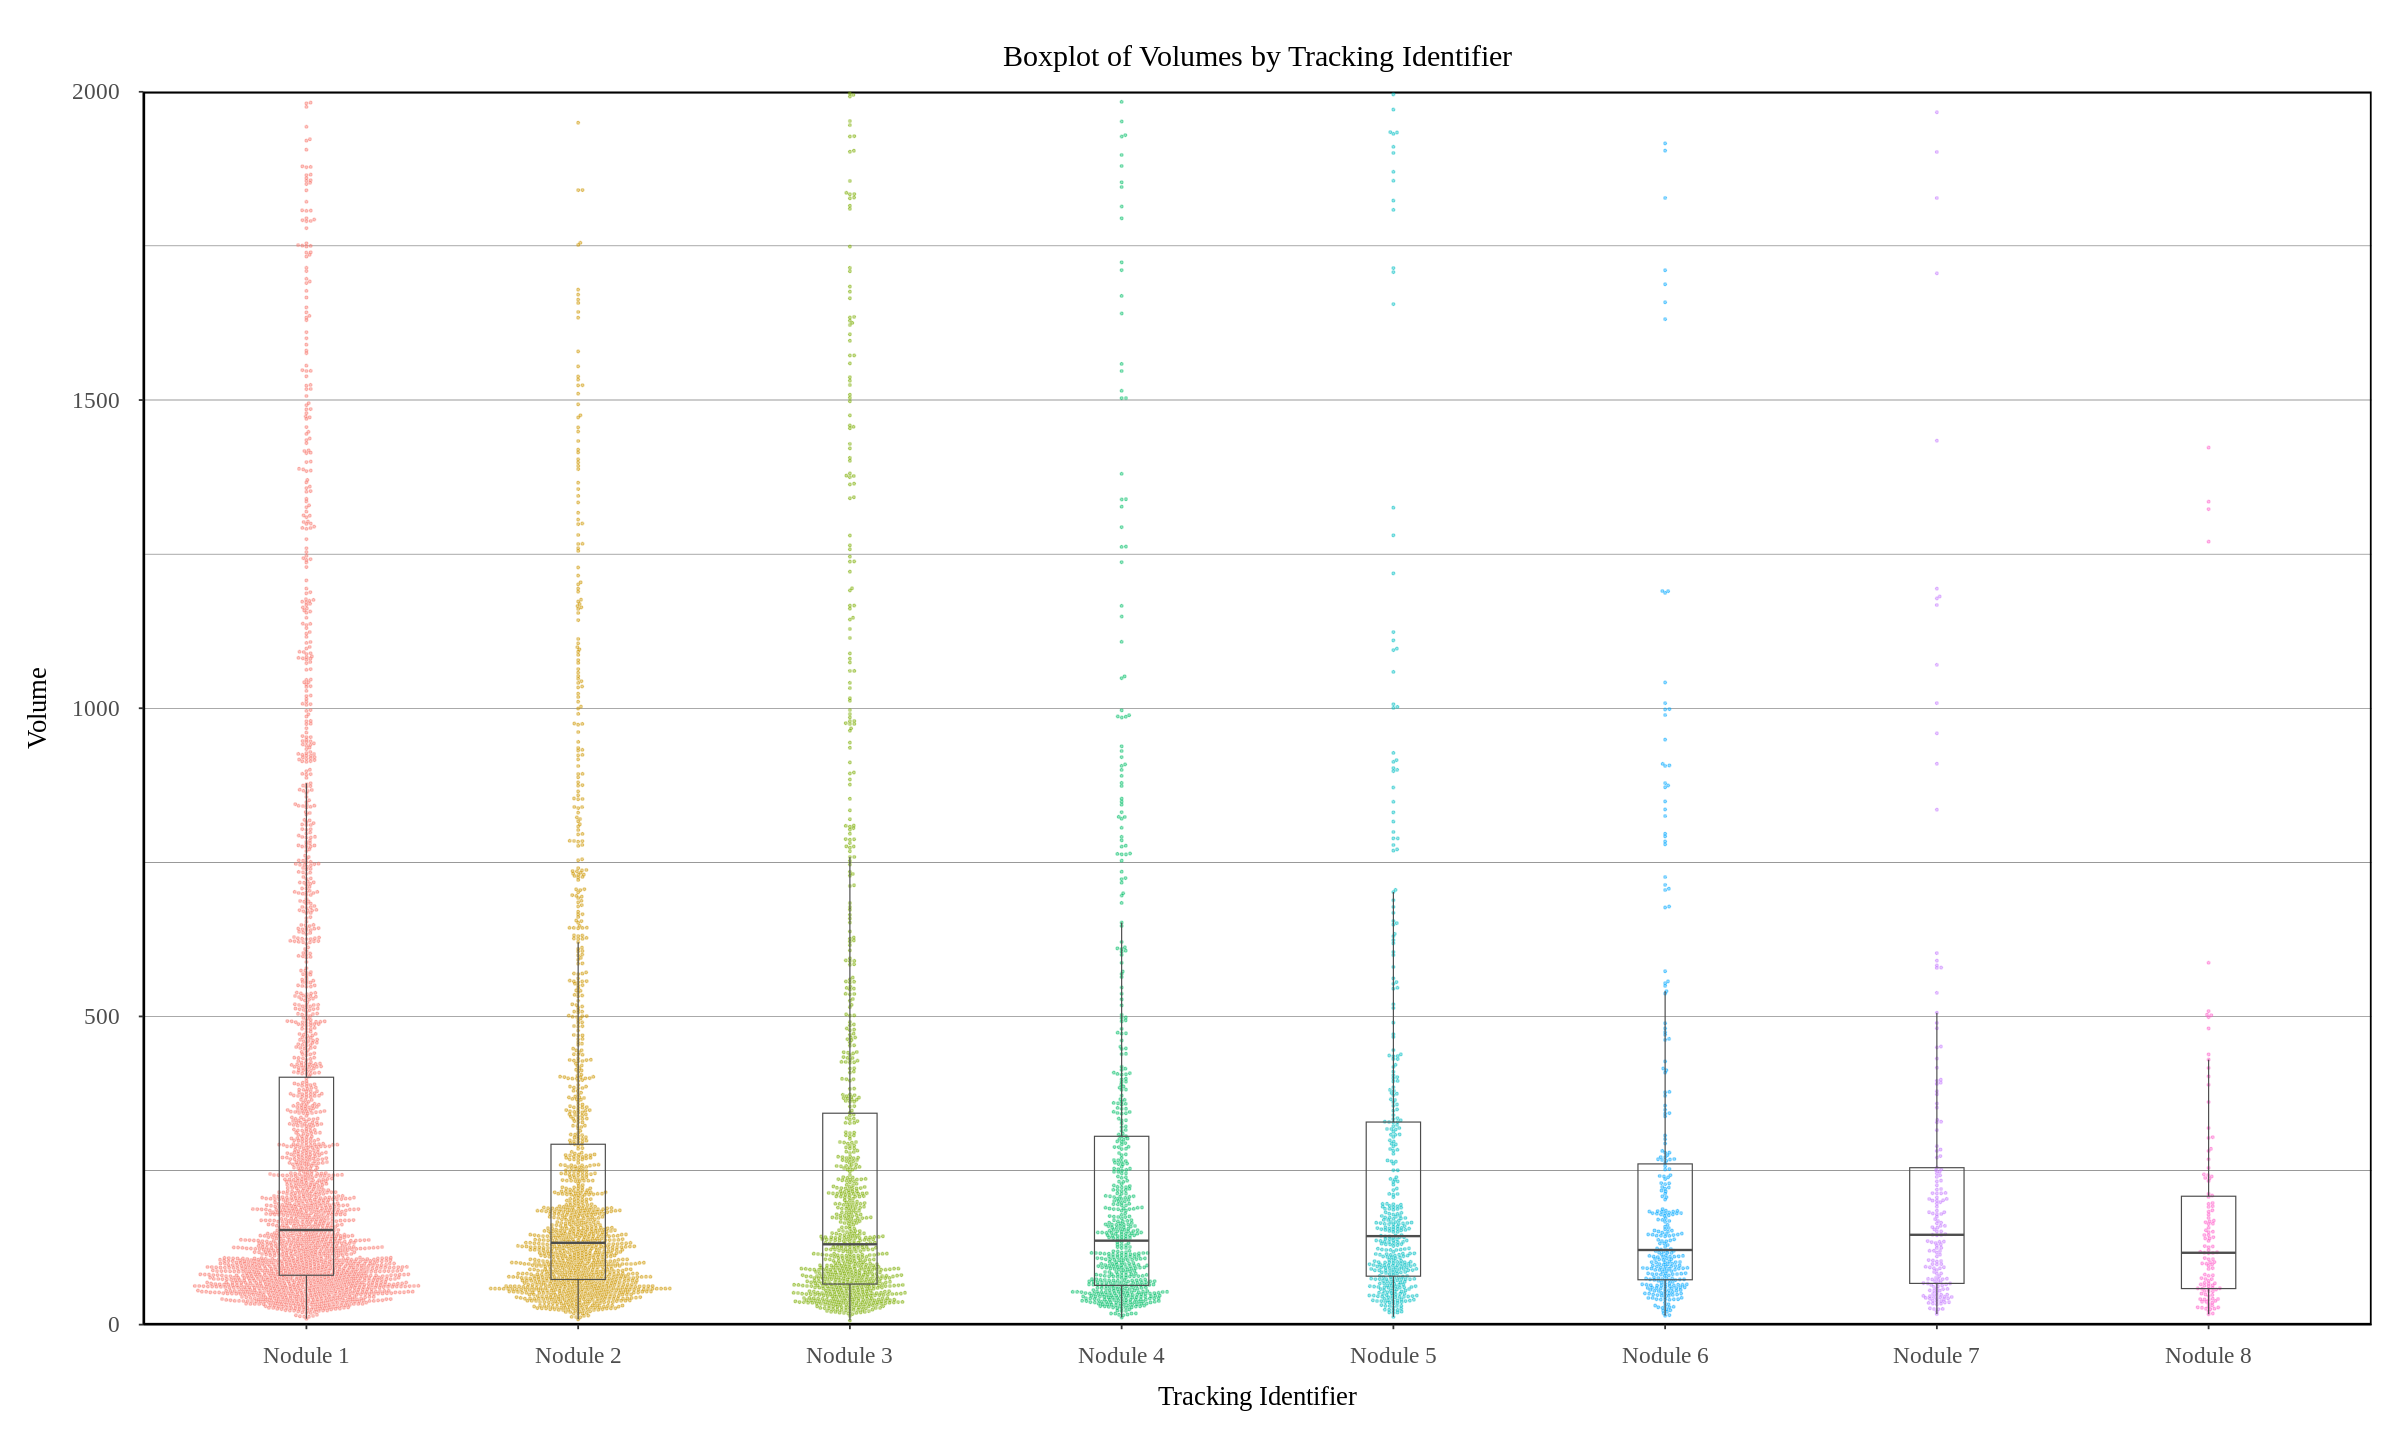

In [ ]:
ggplot(df_filt, aes(x=trackingIdentifier, y=Value, fill=trackingIdentifier, col=trackingIdentifier)) +
  geom_beeswarm(size = 1/2, alpha = 4/10, cex = 1/5) +
  geom_boxplot(aes(x=as.numeric(trackingIdentifier), y=Value, group = trackingIdentifier),
               notch = FALSE, size = 1/3, alpha = 1, colour = "grey30",
               fill = NA, outlier.shape = NA, width = 1/5, notchwidth = 1/5) +
  labs(x="Tracking Identifier", y="Volume", title="Boxplot of Volumes by Tracking Identifier") +
  theme_classic() +
  gtheme +
  guides(fill = FALSE, col = FALSE) +
  scale_fill_manual(values = color_palette) +
  # cap to 2000 for visualization purposes
  scale_y_continuous(
    minor_breaks = seq(0, 2000, 250),
    expand = expansion(mult = c(0.0, 0.0)),
    limits = c(0, 2000)
    )

## Where to go from here

This notebook gives an example of how to use Colab and tabular data part of the Imaging Data Commons (IDC) platform.

IDC offers over 45 TB of publicly available DICOM images, accompanied by image-derived content that can be explored using notebooks such as this one.

<br>

To learn more on what data IDC stores and what can be of use to you and your research, you can visit the ["Files and Metadata" section of the IDC documentation](https://learn.canceridc.dev/data/organization-of-data/files-and-metadata). If you have questions regarding this notebook, the data stored on the platform, or anything IDC related, don't hesitate to get in touch with us in out public forum at [discourse.canceridc.dev](https://discourse.canceridc.dev/).

## Acknowledgments

Imaging Data Commons has been funded in whole or in part with Federal funds from the National Cancer Institute, National Institutes of Health, under Task Order No. HHSN26110071 under Contract No. HHSN261201500003l.

If you use IDC in your research, please cite the following publication:

> Fedorov, A., Longabaugh, W. J. R., Pot, D., Clunie, D. A., Pieper, S. D., Gibbs, D. L., Bridge, C., Herrmann, M. D., Homeyer, A., Lewis, R., Aerts, H. J. W., Krishnaswamy, D., Thiriveedhi, V. K., Ciausu, C., Schacherer, D. P., Bontempi, D., Pihl, T., Wagner, U., Farahani, K., Kim, E. & Kikinis, R. _National Cancer Institute Imaging Data Commons: Toward Transparency, Reproducibility, and Scalability in Imaging Artificial Intelligence_. RadioGraphics (2023). [https://doi.org/10.1148/rg.230180](https://doi.org/10.1148/rg.230180)